# Food Dataset Analysis (EDA)

### Suggestions / Things to Explore in EDA (both datasets):

Note: for each insight found about the dataset, it is recommended to explain what it tells us about the dataset, why it's significant, 

- [ ] **Dataset directory and split integrity:** verify the expected Food-101 structure and examine the `/root/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256` directory and contents. Confirm class counts match expectations (1,000 images per class)
- [ ] **Image resolutions and aspect ratios:** plot width / height histograms, aspect ratios, resolution scatter, and detect outliers
- [ ] **Brightness / contrast and dynamic range:** inspect pixel intensity histograms and per-image mean/std. Find and keep note of any overly dark, blown-out, or low-contrast classes (for normalization)
- [ ] **Sharpness / blur and quality issues:** use Laplacian variance for blur scores to identify classes with many blurry images


### UEC-Food256 Dataset
Things to consider while looking / exploring dataset

- [ ] **Dataset directory names:** as you can see when you first download the dataset, the folders are named as numbers (1-256). It would be a good idea to rename each folder based on the `category.txt` file which stores the name and id
  - After renaming, check to see if there are any folders of the same name. If there are, decide to merge or keep separate with reasoning.
- [ ]

### Resources:
(may be helpful)
*   https://neptune.ai/blog/data-exploration-for-image-segmentation-and-object-detection
*   https://medium.com/@juanabascal78/exploratory-image-analysis-part-1-advanced-density-plots-19b255075dbd
*   https://www.datacamp.com/tutorial/seeing-like-a-machine-a-beginners-guide-to-image-analysis-in-machine-learning

## Import + Download Dataset

In [1]:
%pip install python-dotenv
%pip install roboflow


  Using cached python_dotenv-1.2.1-py3-none-any.whl.metadata (25 kB)
Using cached python_dotenv-1.2.1-py3-none-any.whl (21 kB)

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pyyaml-6.0.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.4 kB)
  Using cached requests_toolbelt-1.0.0-py2.py3-none-any.whl.metadata (14 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached charset_normalizer-3.4.4-cp312-cp312-macosx_10_13_universal2.whl.metadata (37 kB)
   ━━━━━━━━━━

In [2]:
%pip install kagglehub


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# RUN FOR UEC-FOOD256 DATASET

import kagglehub 
# Download latest version 
path = kagglehub.dataset_download("rkuo2000/uecfood256")
print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 3.94G/3.94G [06:43<00:00, 10.5MB/s]

Extracting files...


Path to dataset files: /Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1


In [ ]:
# RUN FOR YUSUF FOOD DATASET
"""
from roboflow import Roboflow
from dotenv import load_dotenv
import os

load_dotenv()  # loads variables from .env into the environment

api_key = os.getenv("YF_API_KEY")

rf = Roboflow(api_key=api_key) 
project = rf.workspace("caretech").project("food-dataset-uj20h-w2s4m")
version = project.version(1)
dataset = version.download("yolov8")
"""

B4jK8Gc5eIoqulJRDvRV
loading Roboflow workspace...
loading Roboflow project...


In [4]:
import os

for subdir, dirs, files in os.walk(path):
    print(f"{subdir} → {len(files)} files")

/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1 → 0 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256 → 2 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/135 → 116 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/61 → 109 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/95 → 106 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/132 → 106 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/59 → 117 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/92 → 168 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/66 → 108 files
/Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/104 

In [7]:
# rename uec food 256 directories

import os
import re
import shutil

DATA_ROOT = os.path.join(path, "UECFOOD256")
CATEGORY_TXT_PATH = os.path.join(path, "UECFOOD256","category.txt")


def sanitize_name(name: str) -> str:
  """
  make a filesystem-safe folder name
  - lowercase
  - trim
  - replace spaces with underscores
  - remove non-alphanumeric characters
  """
  s = name.strip().lower()
  s = s.replace("’", "'")  # normalize curly apostrophes
  s = s.replace('"', '')
  s = s.replace("/", " ")  # avoid path separators
  s = s.replace("\\", " ")
  s = s.replace("&", " and ")
  s = s.replace("+", " plus ")
  s = s.replace("–", "-").replace("—", "-")  # dashes
  s = s.replace("’", "'")
  s = s.replace("’", "'")
  # replace whitespace with underscores
  s = re.sub(r"\s+", "_", s)
  # remove invalid chars (keep a-z0-9 _ - . ')
  s = re.sub(r"[^a-z0-9_\-\.']", "", s)
  # collapse underscores
  s = re.sub(r"_+", "_", s)
  # strip leading/trailing underscores or dots
  s = s.strip("._")
  # fall back if empty
  if not s:
    s = "unnamed"
  return s


def parse_category_txt(path: str) -> dict:
  """
  parse category.txt file
  @return dict mapping numeric id (str) -> sanitized_name
  """
  id_to_name = {}
  if not os.path.isfile(path):
    raise FileNotFoundError(f"category.txt not found at {path}")
  with open(path, "r", encoding="utf-8") as f:
    for line in f:
      line = line.strip()
      if not line or line.startswith("#"):
        continue
      # Lines may be "id  name" with multiple spaces; first token is id, rest is name
      parts = re.split(r"\s+", line, maxsplit=1)
      if len(parts) != 2:
        # skip headers like "id  name"
        continue
      id_str, raw_name = parts
      if not id_str.isdigit():
        continue
      safe = sanitize_name(raw_name)
      id_to_name[id_str] = safe
  return id_to_name


def rename_dirs(root: str, id_to_name: dict, dry_run: bool = False) -> list:
  """
  Rename directories in root from numeric id to category name
  @return list of (old_path, new_path)
  """
  changes = []
  if not os.path.isdir(root):
    raise NotADirectoryError(f"Root path not found: {root}")

  # list only top-level directories
  for entry in os.listdir(root):
    old_path = os.path.join(root, entry)
    if not os.path.isdir(old_path):
      continue
    if not entry.isdigit():
      # Already renamed or a non-id dir like 'UECFOOD256' or 'category.txt' parent; skip
      continue
    id_str = entry
    if id_str not in id_to_name:
      print(f"Warning: id {id_str} not found in category.txt. Skipping.")
      continue
    base_name = id_to_name[id_str]
    new_name = base_name
    new_path = os.path.join(root, new_name)

    # resolve collisions
    if os.path.exists(new_path):
      # If target already exists and is the same folder (unlikely), skip
      # Else append id to make it unique
      alt_name = f"{base_name}_{id_str}"
      alt_path = os.path.join(root, alt_name)
      if os.path.exists(alt_path):
        # As a last resort append a numeric suffix
        suffix = 2
        while True:
          candidate = f"{base_name}_{id_str}_{suffix}"
          candidate_path = os.path.join(root, candidate)
          if not os.path.exists(candidate_path):
            new_name = candidate
            new_path = candidate_path
            break
          suffix += 1
      else:
          new_name = alt_name
          new_path = alt_path

    if dry_run:
      print(f"[DRY RUN] Would rename: {old_path} -> {new_path}")
    else:
      os.rename(old_path, new_path)
      changes.append((old_path, new_path))
      print(f"Renamed: {old_path} -> {new_path}")
  print("changes: ", changes)
  return changes



print(f"Reading categories from: {CATEGORY_TXT_PATH}")
id_to_name = parse_category_txt(CATEGORY_TXT_PATH)
print(f"Parsed {len(id_to_name)} categories.")

# preview changes first
print("\nPreview (dry run):")
rename_dirs(DATA_ROOT, id_to_name, dry_run=True)

# if preview looks good, do actual rename
proceed = True
if proceed:
    print("\nApplying renames:")
    changes = rename_dirs(DATA_ROOT, id_to_name, dry_run=False)
    print(f"\nDone. Renamed {len(changes)} folders.")
else:
    print("\nNo changes applied.")

Reading categories from: /Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256/category.txt
Parsed 256 categories.

Preview (dry run):
changes:  []

Applying renames:
changes:  []

Done. Renamed 0 folders.


## Data Analysis

In [18]:
# Imports for analysis
%pip install seaborn
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
from collections import defaultdict
from tqdm import tqdm
import pandas as pd

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# Define the dataset root
DATA_ROOT = os.path.join(path, "UECFOOD256")
print(f"Dataset root: {DATA_ROOT}")


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Dataset root: /Users/rushildileep/.cache/kagglehub/datasets/rkuo2000/uecfood256/versions/1/UECFOOD256


### 1. Dataset Directory Structure and Integrity

Found 256 classes in dataset



Scanning classes: 100%|██████████| 256/256 [00:00<00:00, 10550.15it/s]

Total classes: 256
Total images: 31395
Average images per class: 122.6
Min images in a class: 100
Max images in a class: 728


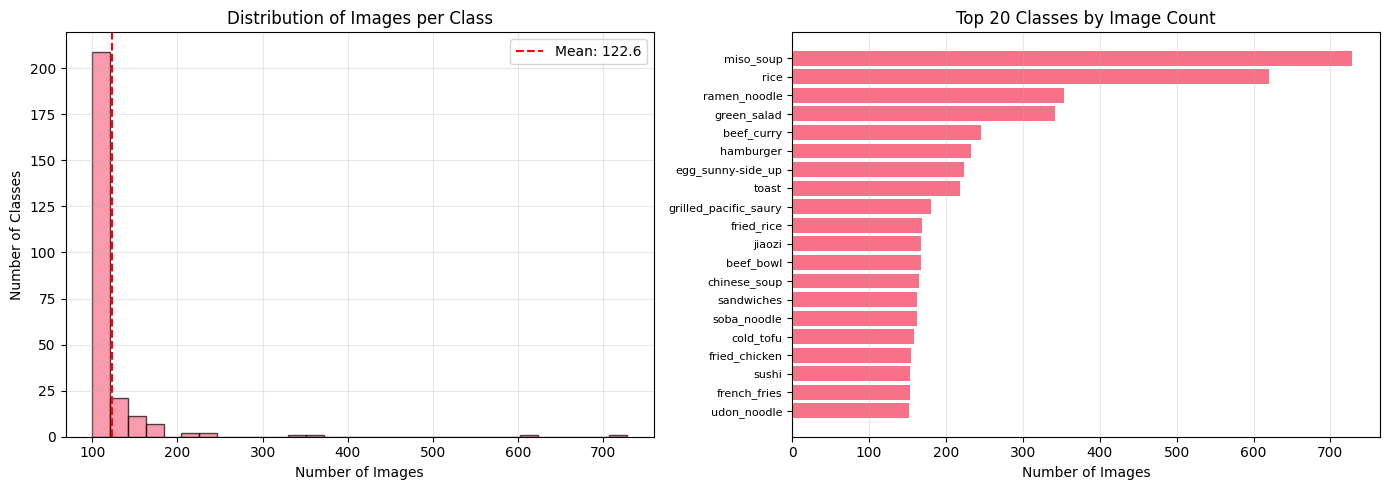

In [ ]:
def analyze_dataset_structure(data_root):
    """
    Analyze the directory structure and count images per class.
    """
    class_stats = {}
    total_images = 0
    
    if not os.path.exists(data_root):
        print(f"ERROR: Dataset root not found at {data_root}")
        return None
    
    classes = [d for d in os.listdir(data_root) 
               if os.path.isdir(os.path.join(data_root, d)) 
               and d != '__MACOSX']
        
    for class_name in tqdm(classes, desc="Scanning classes"):
        class_path = os.path.join(data_root, class_name)
        
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        class_stats[class_name] = len(image_files)
        total_images += len(image_files)
    
    return class_stats, total_images, classes

class_stats, total_images, classes = analyze_dataset_structure(DATA_ROOT)

if class_stats:

    print(f"Total classes: {len(classes)}")
    print(f"Total images: {total_images}")
    print(f"Average images per class: {total_images / len(classes):.1f}")
    print(f"Min images in a class: {min(class_stats.values())}")
    print(f"Max images in a class: {max(class_stats.values())}")
    
    image_counts = list(class_stats.values())
    
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(image_counts, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Number of Images')
    plt.ylabel('Number of Classes')
    plt.title('Distribution of Images per Class')
    plt.axvline(np.mean(image_counts), color='red', linestyle='--', label=f'Mean: {np.mean(image_counts):.1f}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    sorted_counts = sorted(class_stats.items(), key=lambda x: x[1], reverse=True)[:20]
    class_names, counts = zip(*sorted_counts)
    plt.barh(range(len(class_names)), counts)
    plt.yticks(range(len(class_names)), class_names, fontsize=8)
    plt.xlabel('Number of Images')
    plt.title('Top 20 Classes by Image Count')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3, axis='x')
    
    plt.tight_layout()
    plt.show()
    

### 2. Image Resolutions and Aspect Ratios

Analyzing image dimensions (sampling 50 images per class)...


Analyzing dimensions: 100%|██████████| 256/256 [00:01<00:00, 138.07it/s]



Width statistics:
  Min: 99px, Max: 800px
  Mean: 491.4px, Median: 500.0px

Height statistics:
  Min: 71px, Max: 800px
  Mean: 408.4px, Median: 432.0px

Aspect ratio statistics:
  Min: 0.48, Max: 3.33
  Mean: 1.24, Median: 1.33


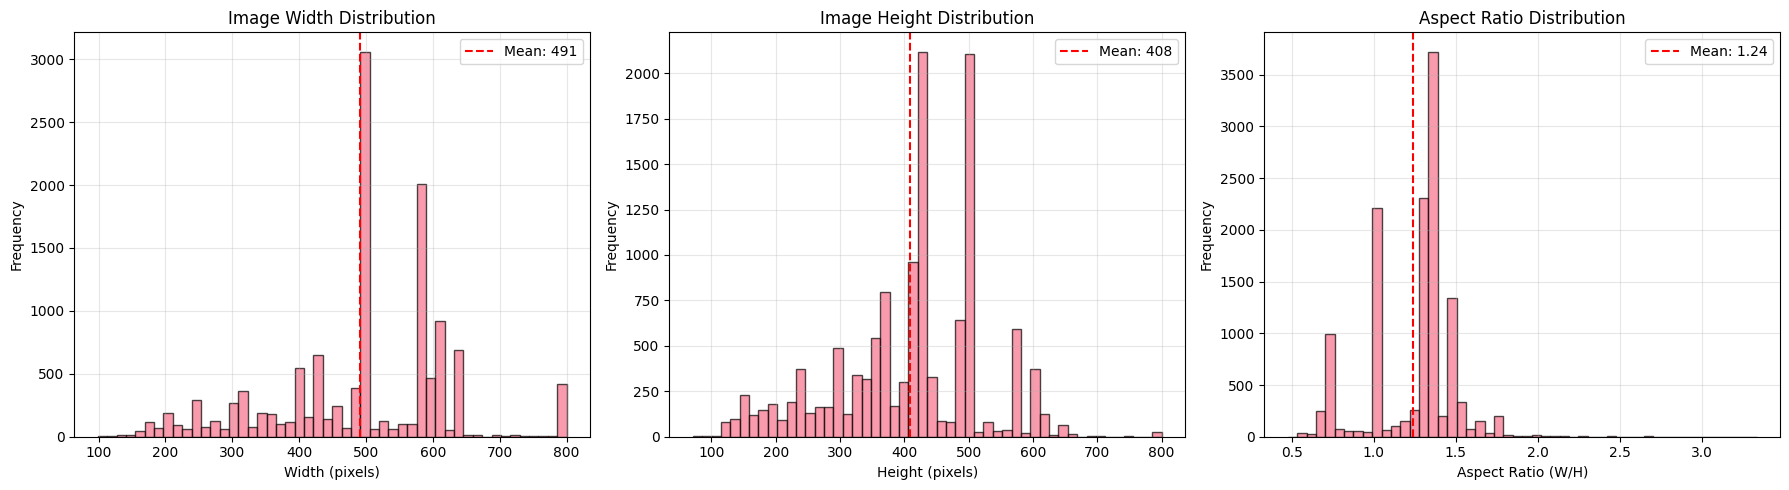

In [40]:
def analyze_image_dimensions(data_root, classes, sample_limit=None):
    """
    Analyze image dimensions, resolutions, and aspect ratios.
    If sample_limit is set, will only analyze that many images per class.
    """
    widths = []
    heights = []
    aspect_ratios = []
    resolutions = []
    
    total_to_process = len(classes) if sample_limit is None else len(classes) * sample_limit
    
    for class_name in tqdm(classes, desc="Analyzing dimensions"):
        class_path = os.path.join(data_root, class_name)
        
        image_files = [f for f in os.listdir(class_path) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        if sample_limit:
            image_files = image_files[:sample_limit]
        
        for img_file in image_files:
            try:
                img_path = os.path.join(class_path, img_file)
                with Image.open(img_path) as img:
                    w, h = img.size
                    widths.append(w)
                    heights.append(h)
                    aspect_ratios.append(w / h)
                    resolutions.append(w * h)
            except Exception as e:
                continue
    
    return widths, heights, aspect_ratios, resolutions

print("Analyzing image dimensions (sampling 50 images per class)...")
widths, heights, aspect_ratios, resolutions = analyze_image_dimensions(
    DATA_ROOT, classes, sample_limit=50
)

print(f"\nWidth statistics:")
print(f"  Min: {min(widths)}px, Max: {max(widths)}px")
print(f"  Mean: {np.mean(widths):.1f}px, Median: {np.median(widths):.1f}px")
print(f"\nHeight statistics:")
print(f"  Min: {min(heights)}px, Max: {max(heights)}px")
print(f"  Mean: {np.mean(heights):.1f}px, Median: {np.median(heights):.1f}px")
print(f"\nAspect ratio statistics:")
print(f"  Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}")
print(f"  Mean: {np.mean(aspect_ratios):.2f}, Median: {np.median(aspect_ratios):.2f}")


fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Width distribution
axes[0].hist(widths, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Width (pixels)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Image Width Distribution')
axes[0].axvline(np.mean(widths), color='red', linestyle='--', label=f'Mean: {np.mean(widths):.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Height distribution
axes[1].hist(heights, bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Height (pixels)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Image Height Distribution')
axes[1].axvline(np.mean(heights), color='red', linestyle='--', label=f'Mean: {np.mean(heights):.0f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Aspect ratio distribution
axes[2].hist(aspect_ratios, bins=50, edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Aspect Ratio (W/H)')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Aspect Ratio Distribution')
axes[2].axvline(np.mean(aspect_ratios), color='red', linestyle='--', label=f'Mean: {np.mean(aspect_ratios):.2f}')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



### 3. Bounding Box Visualization

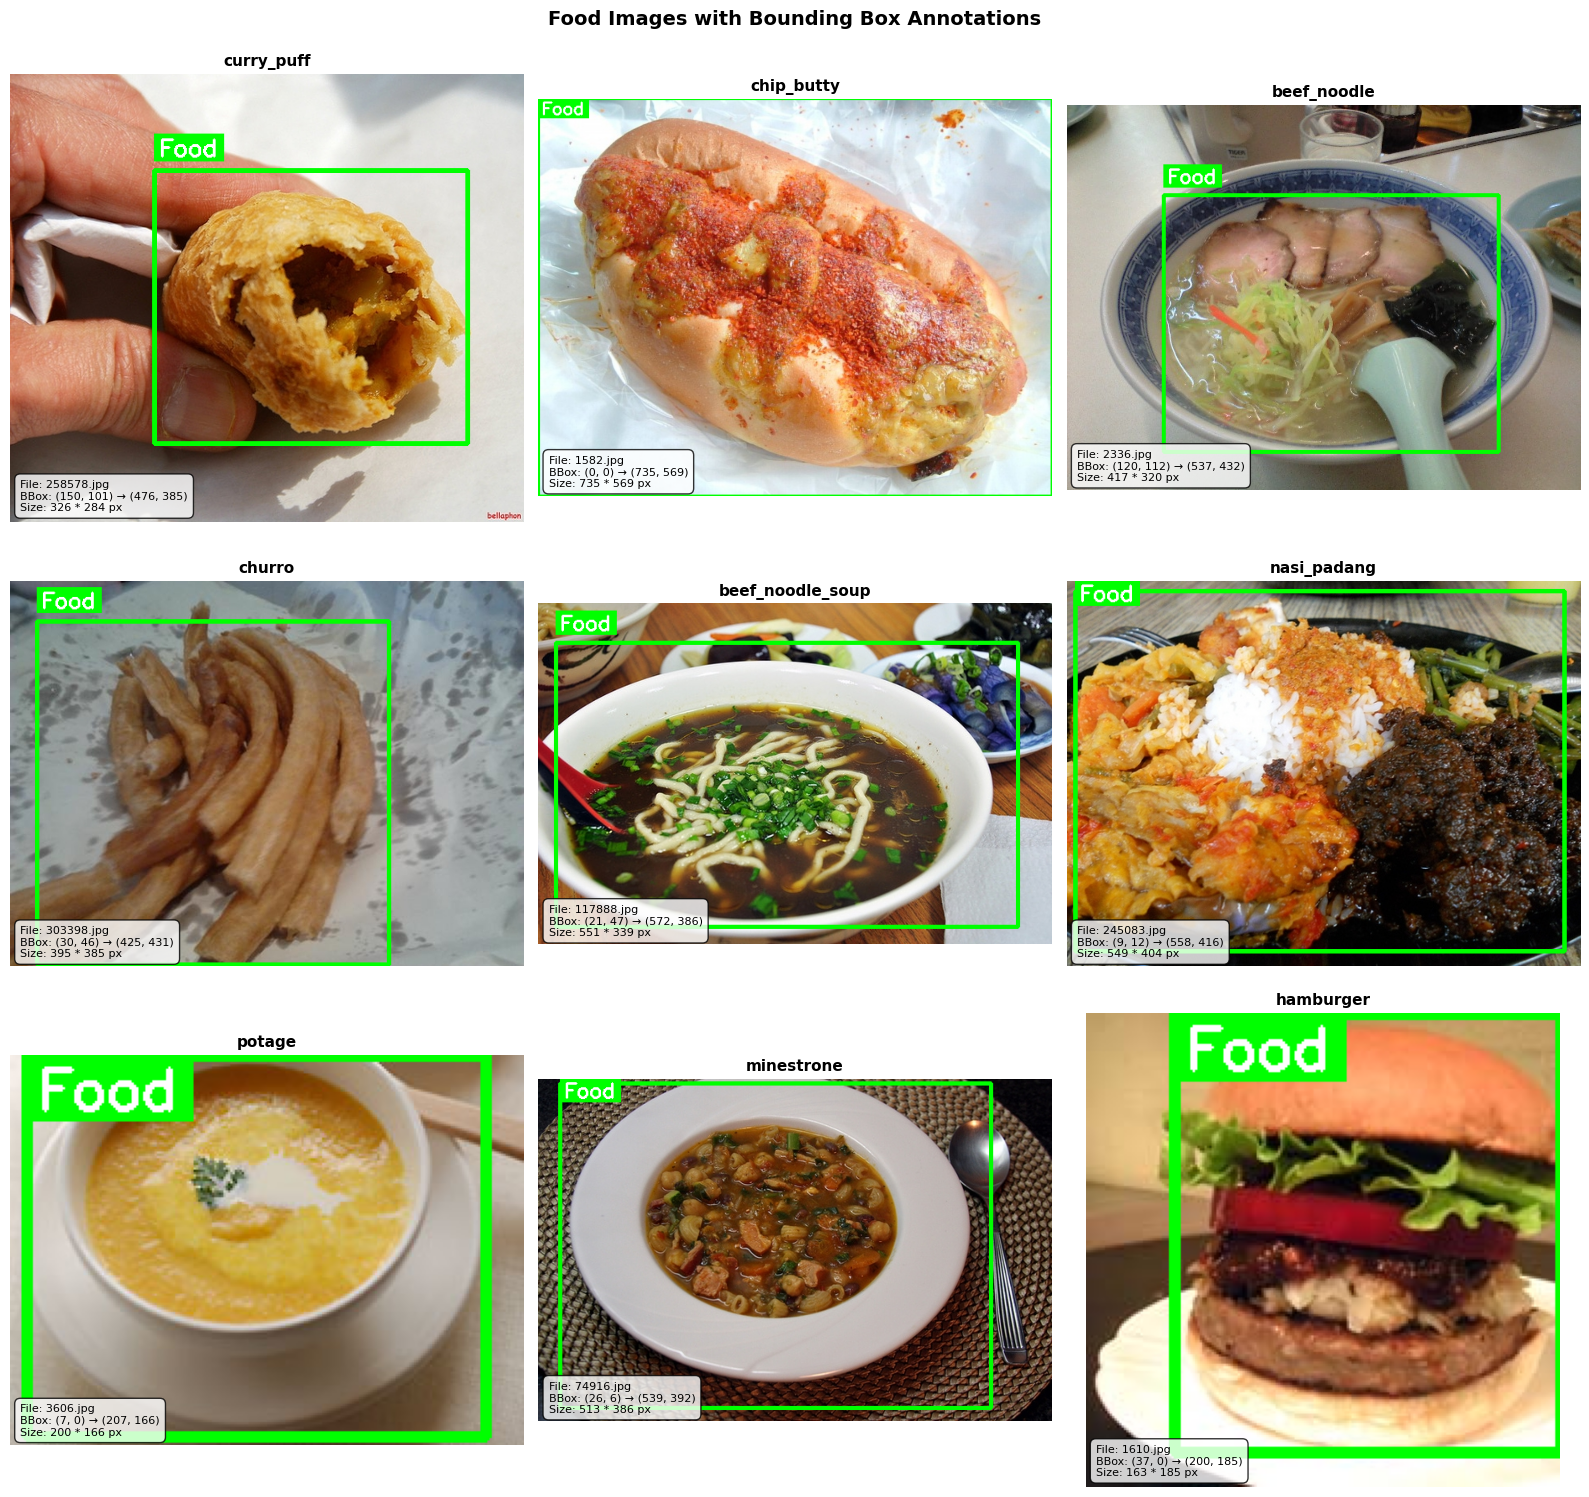

In [43]:
def load_bounding_boxes_robust(bb_file_path):
    """
    Load bounding box information from bb_info.txt file with robust error handling.
    Handles different formats and skips invalid lines.
    """
    bboxes = {}
    if not os.path.exists(bb_file_path):
        return bboxes
    
    with open(bb_file_path, 'r', encoding='utf-8') as f:
        for line_num, line in enumerate(f, 1):
            line = line.strip()
            if not line:
                continue
            
            parts = line.split()
            if len(parts) < 5:
                continue
            
            img_name = parts[0]
            
            try:
                x1, y1, x2, y2 = map(int, parts[1:5])
                bboxes[img_name] = (x1, y1, x2, y2)
            except ValueError:
                continue
    
    return bboxes


def find_matching_image(img_name_from_bbox, all_image_files):
    """
    Try to find a matching image file for a given name from bb_info.txt.
    Handles different naming conventions and file extensions.
    """
    if img_name_from_bbox in all_image_files:
        return img_name_from_bbox
    
    base_name = os.path.splitext(img_name_from_bbox)[0]
    for ext in ['.jpg', '.jpeg', '.JPG', '.JPEG', '.png', '.PNG']:
        candidate = base_name + ext
        if candidate in all_image_files:
            return candidate
    
    img_name_lower = img_name_from_bbox.lower()
    for img_file in all_image_files:
        if img_file.lower() == img_name_lower:
            return img_file
    
    return None


def draw_bbox_on_image(image, bbox, class_name, color=(0, 255, 0), thickness=3):
    """
    Draw a single bounding box on an image with label.
    """
    if isinstance(image, Image.Image):
        img_array = np.array(image)
    else:
        img_array = image.copy()
    
    if len(img_array.shape) == 2:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    elif img_array.shape[2] == 4:
        img_array = cv2.cvtColor(img_array, cv2.COLOR_RGBA2RGB)
    
    img_bgr = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)
    
    x1, y1, x2, y2 = bbox
    cv2.rectangle(img_bgr, (x1, y1), (x2, y2), color, thickness)
    
    label = "Food"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.8
    font_thickness = 2
    
    (text_width, text_height), baseline = cv2.getTextSize(label, font, font_scale, font_thickness)
    
    label_y = max(y1 - 10, text_height + 10)
    cv2.rectangle(img_bgr, 
                  (x1, label_y - text_height - 10), 
                  (x1 + text_width + 10, label_y), 
                  color, -1)
    
    cv2.putText(img_bgr, label, (x1 + 5, label_y - 5), 
                font, font_scale, (255, 255, 255), font_thickness)
    
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    return img_rgb


def collect_samples_with_bboxes(data_root, classes, num_samples=9, max_attempts=50):
    """
    Collect sample images with bounding boxes from the dataset.
    """
    samples = []
    attempts = 0
    checked_classes = set()
    
    shuffled_classes = list(classes)
    np.random.shuffle(shuffled_classes)
    
    for class_name in shuffled_classes:
        if len(samples) >= num_samples:
            break
        
        if attempts >= max_attempts:
            print(f"Reached max attempts ({max_attempts}). Found {len(samples)} samples.")
            break
        
        attempts += 1
        checked_classes.add(class_name)
        
        class_path = os.path.join(data_root, class_name)
        bb_file = os.path.join(class_path, "bb_info.txt")
        
        if not os.path.exists(bb_file):
            continue
        
        bboxes_dict = load_bounding_boxes_robust(bb_file)
        if not bboxes_dict:
            continue
        
        all_image_files = {f for f in os.listdir(class_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))}
        
        if not all_image_files:
            continue
        
        matched_images = []
        for img_name_bbox in bboxes_dict.keys():
            matched_file = find_matching_image(img_name_bbox, all_image_files)
            if matched_file:
                matched_images.append((matched_file, bboxes_dict[img_name_bbox]))
        
        if not matched_images:
            continue
        
        img_file, bbox = matched_images[np.random.randint(0, len(matched_images))]
        img_path = os.path.join(class_path, img_file)
        
        try:
            img = Image.open(img_path).convert('RGB')
            img_with_bbox = draw_bbox_on_image(img, bbox, class_name)
            
            samples.append({
                'image': img_with_bbox,
                'class': class_name,
                'bbox': bbox,
                'filename': img_file
            })
            
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue
    
    return samples



samples = collect_samples_with_bboxes(DATA_ROOT, classes, num_samples=9)

if samples:
    n_samples = len(samples)
    n_cols = 3
    n_rows = (n_samples + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
    
    if n_samples == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    for idx, sample in enumerate(samples):
        axes[idx].imshow(sample['image'])
        axes[idx].set_title(f"{sample['class']}", fontsize=11, fontweight='bold')
        axes[idx].axis('off')
        
        x1, y1, x2, y2 = sample['bbox']
        w, h = x2 - x1, y2 - y1
        
        info_text = f"File: {sample['filename']}\nBBox: ({x1}, {y1}) → ({x2}, {y2})\nSize: {w} * {h} px"
        axes[idx].text(0.02, 0.02, info_text, 
                      transform=axes[idx].transAxes, 
                      fontsize=8, 
                      verticalalignment='bottom',
                      bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))
    
    for idx in range(n_samples, len(axes)):
        axes[idx].axis('off')
    
    plt.suptitle('Food Images with Bounding Box Annotations', fontsize=14, fontweight='bold', y=0.995)
    plt.tight_layout()
    plt.show()